In [5]:
#pip install numpy

In [6]:
#pip install scikit-learn

In [7]:
#pip install pandas

In [8]:
#pip install seaborn

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sys

### Read Input Csv File

In [10]:
data= pd.read_csv('../4_InputData/XYZ_train_m.csv')
data.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1533,642.0,1,0.5,0,0,1,38.0,0.8,86.0,5,...,887,1775.0,435.0,9,2,2.0,1,1,0,0
811,807.0,0,0.5,0,9,0,8.0,0.3,158.0,5,...,667,697.0,1284.0,17,13,2.0,0,1,1,0
914,694.0,1,1.8,1,15,0,36.0,0.4,193.0,4,...,983,1230.0,3676.0,12,8,5.0,1,0,1,3
324,1698.0,0,2.1,0,5,1,18.0,0.9,160.0,6,...,363,994.0,796.0,13,3,14.0,1,0,1,0
498,1926.0,1,1.7,1,1,1,33.0,0.4,172.0,3,...,982,1157.0,2488.0,6,1,14.0,1,0,0,2


In [11]:
r,c=data.shape
print(f'Number of Rows is {r} \nNumber of Columns is {c}')

Number of Rows is 2007 
Number of Columns is 21


## EDA

In [12]:
info_col=data.info()
#print(info_col)
info_col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2005 non-null   float64
 1   blue           2007 non-null   int64  
 2   clock_speed    2005 non-null   float64
 3   dual_sim       2007 non-null   int64  
 4   fc             2007 non-null   int64  
 5   four_g         2007 non-null   int64  
 6   int_memory     2005 non-null   float64
 7   m_dep          2007 non-null   float64
 8   mobile_wt      2004 non-null   float64
 9   n_cores        2007 non-null   int64  
 10  pc             2007 non-null   int64  
 11  px_height      2007 non-null   int64  
 12  px_width       2005 non-null   float64
 13  ram            2004 non-null   float64
 14  sc_h           2007 non-null   int64  
 15  sc_w           2007 non-null   int64  
 16  talk_time      2006 non-null   float64
 17  three_g        2007 non-null   int64  
 18  touch_sc

### Check for missing values

In [13]:
print(data.columns[data.isna().any()].tolist())

['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 'px_width', 'ram', 'talk_time']


In [14]:
data.isna().sum()

battery_power    2
blue             0
clock_speed      2
dual_sim         0
fc               0
four_g           0
int_memory       2
m_dep            0
mobile_wt        3
n_cores          0
pc               0
px_height        0
px_width         2
ram              3
sc_h             0
sc_w             0
talk_time        1
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Fill missing values

In [15]:
data.fillna(data.mean(),inplace=True)


In [16]:
# data.isna().sum()

### Check for duplicate values

In [17]:
duplicate = data[data.duplicated()]
duplicate

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2005,1512.0,0,0.9,0,4,1,46.0,0.1,145.0,5,...,336,670.0,869.0,18,10,19.0,1,1,1,0


### Delete duplicate values

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


### Normalize continuous variables

In [20]:
for i in ["battery_power", "blue", "clock_speed", "dual_sim", "fc", "four_g", "int_memory", "m_dep", 'mobile_wt', "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time", "three_g", "touch_screen", "wifi"]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

print("\nFinal Processed Data:\n", )
data.sample(8)


Final Processed Data:



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
839,0.456246,0.0,0.40,1.0,0.052632,1.0,0.741935,0.555556,0.925000,0.000000,...,0.264796,0.718959,0.817477,0.857143,0.388889,0.666667,1.0,1.0,1.0,3
521,0.418838,1.0,0.24,0.0,0.473684,1.0,0.709677,0.888889,0.458333,1.000000,...,0.383163,0.722296,0.314805,0.000000,0.000000,0.500000,1.0,0.0,0.0,1
1980,0.286573,1.0,0.20,1.0,0.210526,1.0,0.032258,0.888889,0.533333,1.000000,...,0.518878,0.526702,0.470337,0.571429,0.555556,0.777778,1.0,1.0,1.0,1
432,0.614562,0.0,0.92,0.0,0.000000,1.0,0.887097,0.333333,0.708333,0.000000,...,0.398469,0.772363,0.673169,0.571429,0.444444,0.666667,1.0,0.0,1.0,3
1294,0.058784,1.0,0.00,0.0,0.052632,1.0,0.919355,0.666667,0.550000,1.000000,...,0.387245,0.906542,0.028327,0.785714,0.555556,0.222222,1.0,1.0,1.0,0
1168,0.500334,1.0,0.36,0.0,0.421053,0.0,0.677419,0.111111,0.850000,0.857143,...,0.358673,0.341121,0.434527,0.642857,0.055556,0.666667,0.0,0.0,0.0,1
959,0.713427,0.0,0.00,1.0,0.157895,0.0,0.500000,0.111111,0.558333,0.000000,...,0.264796,0.287049,0.877071,0.928571,0.055556,0.722222,1.0,0.0,1.0,3
1148,0.150969,1.0,0.40,0.0,0.000000,1.0,0.483871,1.000000,0.425000,0.857143,...,0.414796,0.585447,0.436932,1.000000,0.722222,0.277778,1.0,0.0,1.0,1


### Check for outliers, and anomalies

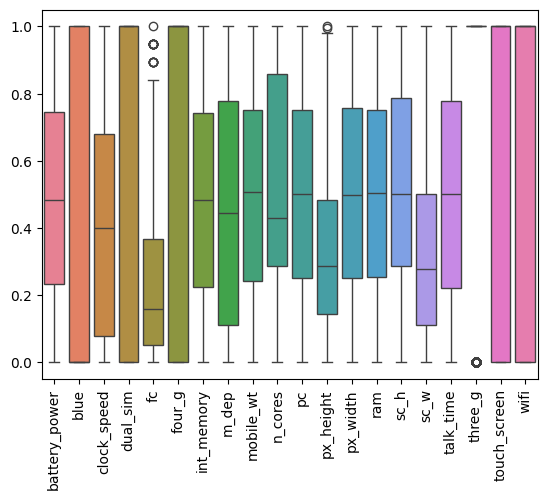

In [21]:
dataInd=data.drop("price_range",axis=1)
sys.boxplot(dataInd)
plt.title("")
plt.xticks(rotation=90)
plt.show()

### Delete outliers, and anomalies

In [22]:
for i in ["fc","px_height"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print("outliers in ", i )
    print(outliers)
    data[i] = np.where((data[i] < lower_bound) | (data[i] > upper_bound), data[i].median(), data[i])

print("\nFinal Processed Data:\n", )
data.sample(8)



outliers in  fc
      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
95         0.424850   1.0         0.20       0.0  0.947368     0.0   
169        0.713427   0.0         0.92       1.0  0.894737     0.0   
226        0.806279   1.0         0.76       1.0  0.947368     1.0   
229        0.793587   0.0         0.52       0.0  0.894737     0.0   
300        0.959252   1.0         0.48       0.0  0.894737     0.0   
305        0.565798   0.0         0.60       0.0  0.947368     0.0   
372        0.802939   1.0         0.40       1.0  0.894737     1.0   
584        0.297261   1.0         0.84       1.0  0.894737     0.0   
1387       0.689379   1.0         0.24       1.0  0.947368     1.0   
1406       0.821643   1.0         0.72       1.0  0.947368     0.0   
1416       0.632599   0.0         0.00       1.0  0.947368     0.0   
1549       0.849031   1.0         0.44       0.0  0.894737     1.0   
1554       0.972612   0.0         0.28       1.0  0.947368     1.0   
1693

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1044,0.478958,1.0,0.92,1.0,0.157895,0.0,0.596774,0.777778,0.583333,0.857143,...,0.572449,0.831776,0.377071,0.357143,0.000000,0.555556,0.0,0.0,0.0,1
1613,0.784903,0.0,0.44,0.0,0.105263,0.0,0.564516,0.111111,0.541667,0.000000,...,0.068367,0.465287,0.603688,0.642857,0.444444,0.111111,1.0,0.0,1.0,2
1304,0.384770,1.0,0.48,1.0,0.052632,0.0,0.903226,0.777778,0.050000,0.857143,...,0.068878,0.929239,0.974345,0.285714,0.166667,0.055556,1.0,0.0,0.0,3
237,0.812959,1.0,0.80,1.0,0.736842,1.0,0.064516,0.000000,0.858333,0.571429,...,0.287755,0.320427,0.935061,0.142857,0.055556,0.333333,1.0,1.0,1.0,3
983,0.450234,1.0,0.32,0.0,0.105263,0.0,0.274194,0.222222,0.700000,0.857143,...,0.445408,0.596796,0.451096,0.285714,0.222222,0.388889,1.0,1.0,0.0,1
1047,0.050100,0.0,0.28,0.0,0.052632,0.0,0.451613,0.777778,0.683333,1.000000,...,0.432143,0.262350,0.679850,0.428571,0.333333,0.777778,0.0,1.0,1.0,2
670,0.091516,0.0,0.48,1.0,0.578947,0.0,0.403226,0.444444,0.183333,0.428571,...,0.597449,0.589453,0.662480,0.142857,0.111111,0.388889,1.0,1.0,0.0,2
1522,0.217101,1.0,0.76,1.0,0.736842,1.0,0.887097,0.555556,0.308333,0.142857,...,0.549490,0.455941,0.441208,0.714286,0.777778,0.166667,1.0,0.0,0.0,1


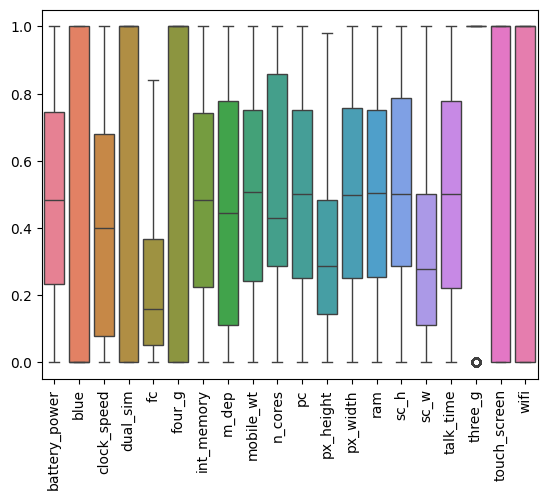

In [23]:
dataInd=data.drop("price_range",axis=1)
sys.boxplot(dataInd)
plt.title("")
plt.xticks(rotation=90)
plt.show()

## Visualization

### Count Plot for Price Range Distribution

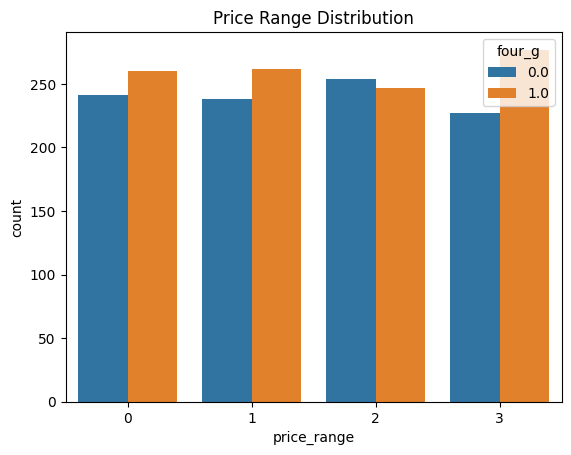

In [24]:
sys.countplot(data, x="price_range", hue="four_g")
plt.title('Price Range Distribution')
plt.show()


### Scatter Plot of Price Range vs Ram

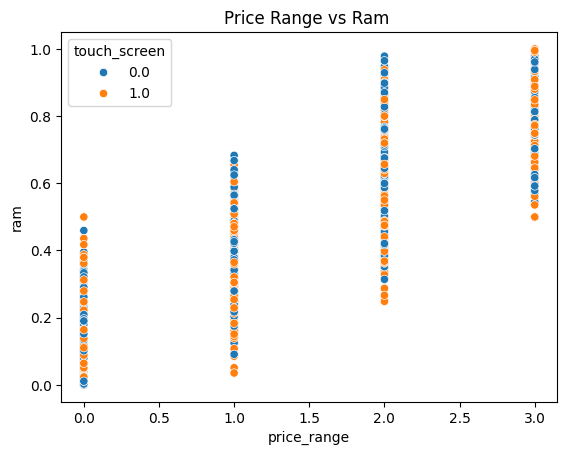

In [25]:
sys.scatterplot(data=data, x="price_range", y="ram", hue="touch_screen")
plt.title('Price Range vs Ram ')
plt.show()

### Box Plot for Price Range vs Battery Power 

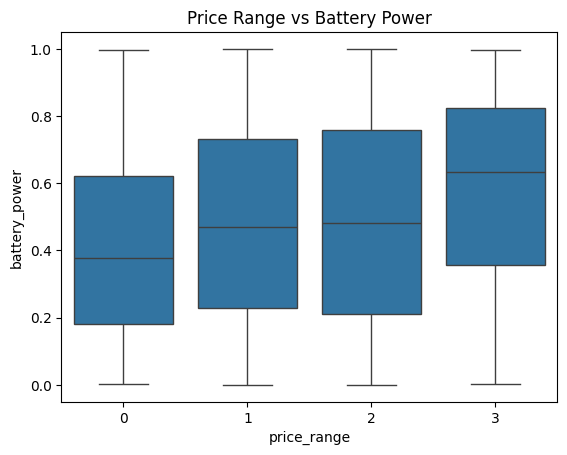

In [26]:
sys.boxplot(data=data, x="price_range", y="battery_power")
plt.title('Price Range vs Battery Power')
plt.show()

### Distribution of Px Height Between Price Range With HistPlot

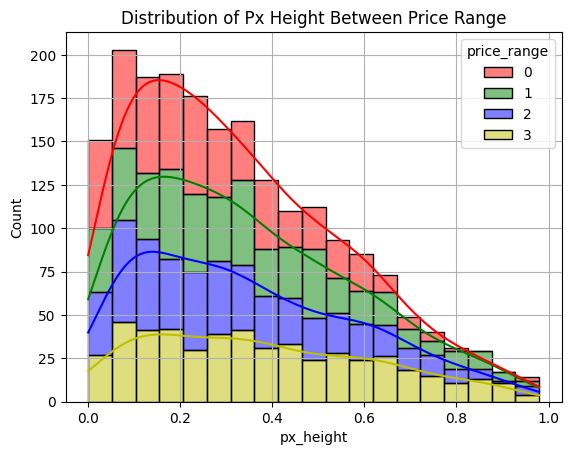

In [27]:
sys.histplot(data=data, x="px_height", hue="price_range",kde=True,multiple="stack",palette=['r','g','b','y'])
plt.title('Distribution of Px Height Between Price Range')
plt.grid()
plt.show()

### Evaluate feature importance using correlation matrix

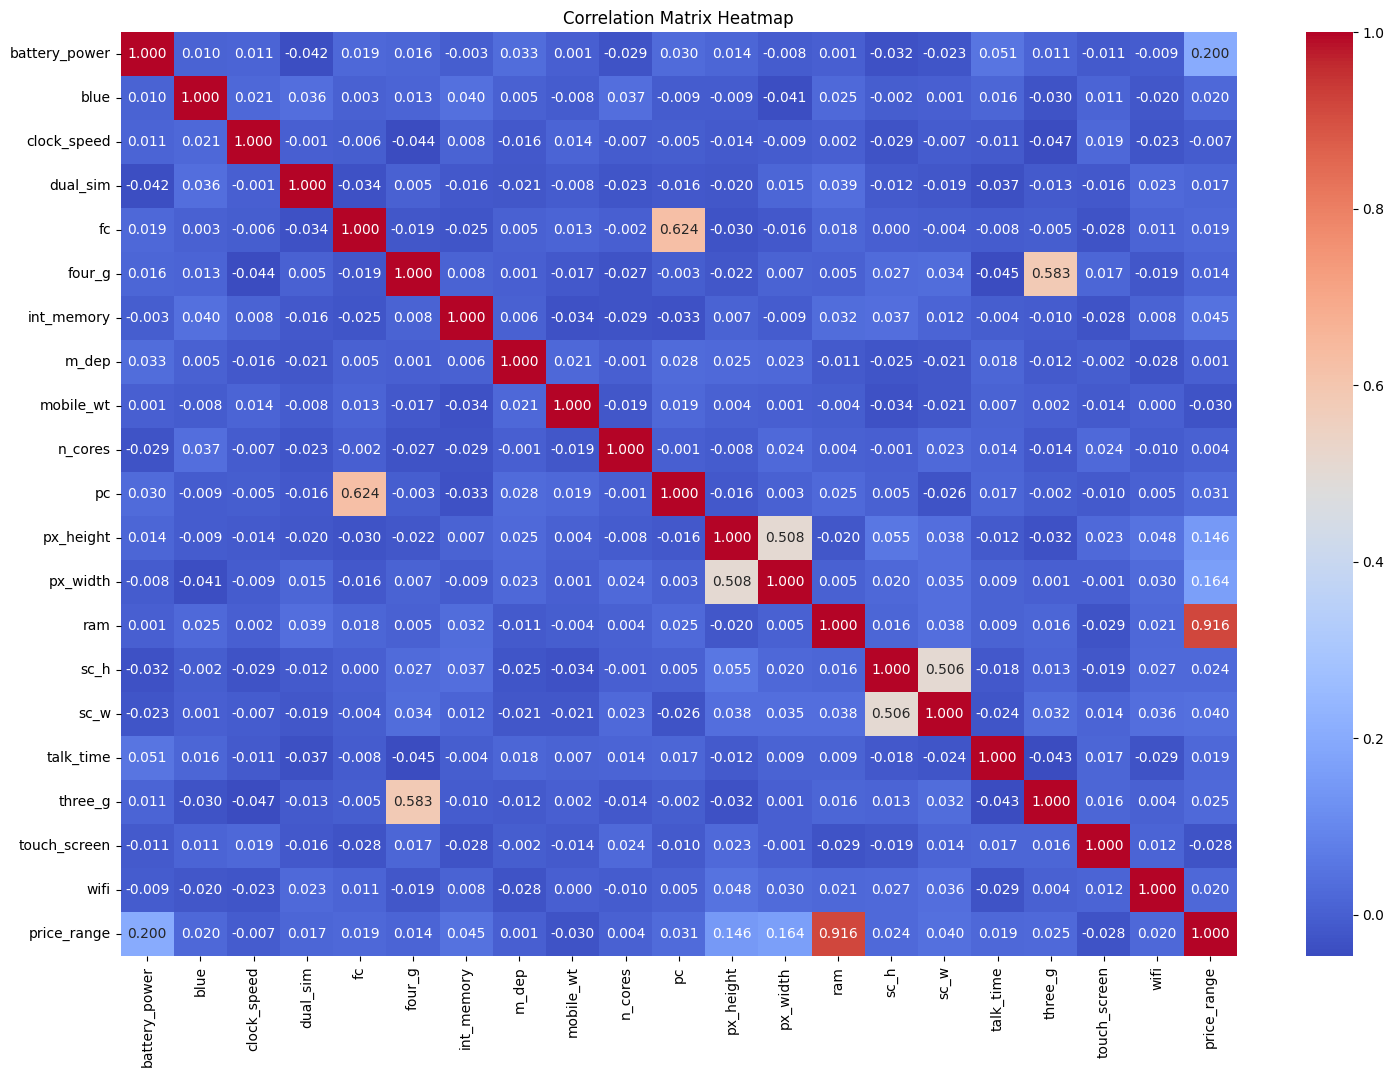

In [28]:
datad = data.corr()
plt.figure(figsize=(18,12))
sys.heatmap(datad, cmap='coolwarm',annot=True, fmt=".3f")

plt.title('Correlation Matrix Heatmap')
plt.show()


In [29]:
coeere=data.corr()['price_range']
coeere=list(coeere)
data2=pd.DataFrame(coeere,columns=['Value'])
data2['Feature']=data.columns
data2


,Value,Feature
0,0.199934,battery_power
1,0.020069,blue
2,-0.006797,clock_speed
3,0.016889,dual_sim
4,0.019300,fc
5,0.013728,four_g
6,0.045116,int_memory
7,0.000603,m_dep
8,-0.029740,mobile_wt
9,0.004459,n_cores


In [30]:
dataSort = data2.sort_values(by='Value',ascending=False,key=abs)
dataSort

,Value,Feature
20,1.000000,price_range
13,0.915802,ram
0,0.199934,battery_power
12,0.163549,px_width
11,0.145811,px_height
6,0.045116,int_memory
15,0.040386,sc_w
10,0.030696,pc
8,-0.029740,mobile_wt
18,-0.028089,touch_screen


### Plot Feature Importance using Barplot

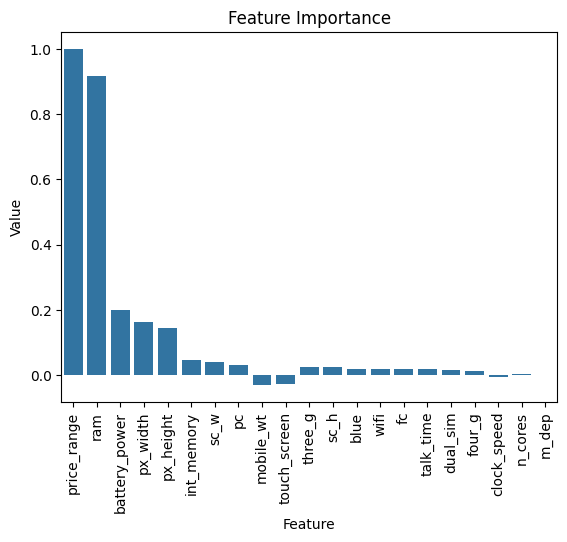

In [31]:
sys.barplot(dataSort, x="Feature", y="Value")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()


In [32]:
data3=data.drop(columns=['blue','wifi','fc','talk_time','dual_sim','four_g','clock_speed','n_cores','m_dep'])
data3

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,price_range
0,0.227789,0.080645,0.900000,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.0,0.0,1
1,0.347361,0.822581,0.466667,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,1.0,1.0,2
2,0.041416,0.629032,0.541667,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,1.0,1.0,2
3,0.076152,0.129032,0.425000,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,1.0,0.0,2
4,0.881764,0.677419,0.508333,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.238477,0.484466,0.502329,0.10,0.269388,0.501719,0.994655,0.857143,0.888889,1.0,1.0,3
2002,0.195725,0.000000,0.502329,0.70,0.623469,0.927904,0.499453,0.571429,0.222222,1.0,1.0,0
2003,0.492462,0.596774,0.891667,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,1.0,1.0,2
2004,0.941884,0.548387,0.502329,0.15,0.442857,0.501719,0.748530,0.285714,0.055556,1.0,1.0,3


### Export Final Processed Data in OUTPUT.csv


In [33]:
data3.to_csv("../5_OutputData/OUTPUT.csv",index=False)